Nombres: 
- Imanol Mendoza Saenz de Buruaga
- Luis Enrique Villalón Pineda

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('tallas.csv')

talla_map = {'L': 1, 'M': 0}
data['color'] = data.talla.map(talla_map)

In [22]:
data['talla'].map(talla_map)

0     1
1     1
2     0
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    1
11    0
12    1
13    1
14    0
15    1
16    0
17    1
18    1
19    1
Name: talla, dtype: int64

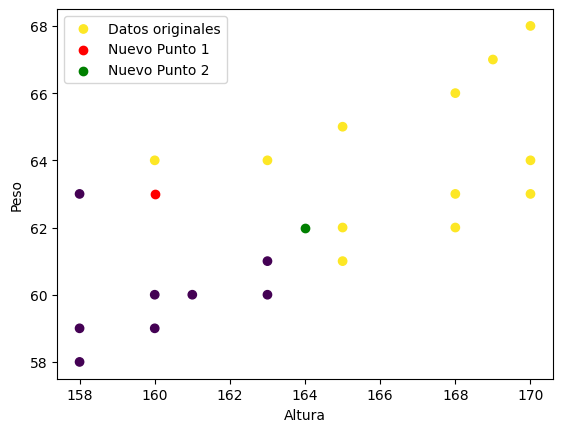

In [23]:
column1 = np.array([160, 63])
column2= np.array([164, 62])
plt.scatter(data['altura'], data['peso'], c=data['color'], label='Datos originales')
plt.scatter(column1[0], column1[1], c='red', label='Nuevo Punto 1')
plt.scatter(column2[0], column2[1], c='green', label='Nuevo Punto 2')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.show()


In [25]:
def k_vecinos(data, point, k=5, distance_metric='euclidean'):
    data_i = data[['altura', 'peso']].to_numpy()
    point_i = np.array(point)

    if distance_metric == 'euclidean':
        distances = [[i, np.linalg.norm(data_i[i] - point_i)] for i in range(len(data_i))]
    elif distance_metric == 'cityblock':
        distances = [[i, np.sum(np.abs(data_i[i] - point_i))] for i in range(len(data_i))]


    dist_df = pd.DataFrame(distances, columns=['index', 'distances'])

    return dist_df.sort_values('distances').head(k)

In [15]:
cercanos1 = k_vecinos(data, column1, k=5, distance_metric='euclidean')
cercanos2 = k_vecinos(data, column1, k=5, distance_metric='cityblock')
cercanos3 = k_vecinos(data, column1, k=5, distance_metric='euclidean')
cercanos4 = k_vecinos(data, column2, k=5, distance_metric='cityblock')


In [33]:
def points_K(data, point, cercanos, color='k'):
    plt.scatter(data['altura'], data['peso'], c=data['color'], label='Datos originales')
    plt.scatter(point[0], point[1], color=color, label='Punto de Interés', marker='o', s=100)

    for c in cercanos.values:
        p = data.iloc[int(c[0]), :]
        plt.plot([point[0], p['altura']], [point[1], p['peso']], color=color, linestyle=':')

    plt.xlabel('Altura')
    plt.ylabel('Peso')
    plt.title('Puntos más cercanos')
    plt.legend()
    plt.show()


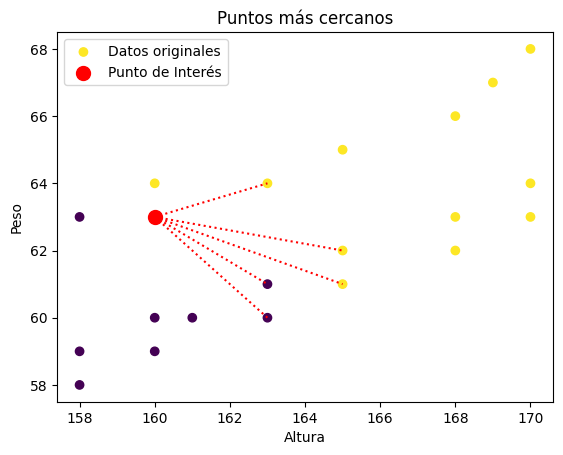

In [34]:
points_K(data, column1, cercanos4, color='red')
